In [34]:
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
# 因为我们在针对测试集评估模型时并未进行监督学习，因此我们不必将数据集分为训练集和测试集。
(X_cancer,y_cancer) = load_breast_cancer(return_X_y= True)
# 每一个特征都应该被中心化（均值为0）并且有单位方差
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)

pca = PCA(n_components=2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
print(X_cancer.shape,X_pca.shape)

(569, 30) (569, 2)


In [36]:
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    

Text(0.5, 1.0, 'Breast cancer dataset PCA (n_components = 2)')

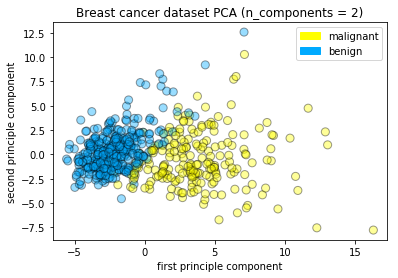

In [37]:
plot_labelled_scatter(X_pca,y_cancer,['malignant','benign'])
plt.xlabel('first principle component')
plt.ylabel('second principle component')
plt.title('Breast cancer dataset PCA (n_components = 2)')

## MDS on the fruit dataset

In [38]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_63a9cff2ccd745f4aac0141b03cee536 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cEkITcKpSqIivMFetABvhrJF560Yblivtr_CN6eEn6kj',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_63a9cff2ccd745f4aac0141b03cee536.get_object(Bucket='appleexample-donotdelete-pr-yizabrb7keakap',Key='fruit_data_with_colors.txt.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

fruits = pd.read_csv(body)

In [39]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


Text(0.5, 1.0, 'fruits dataset MDS (n_components = 2)')

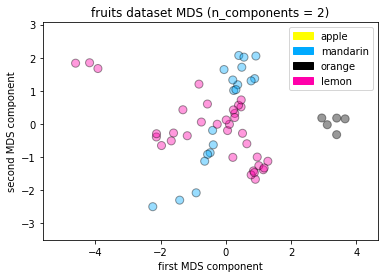

In [40]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)
mds = MDS(n_components=2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds,y_fruits,['apple','mandarin','orange','lemon'])

plt.xlabel('first MDS component')
plt.ylabel('second MDS component')
plt.title('fruits dataset MDS (n_components = 2)')

## t-SNE on the fruit dataset

Text(0.5, 1.0, 'fruits dataset t-SNE (n_components = 2)')

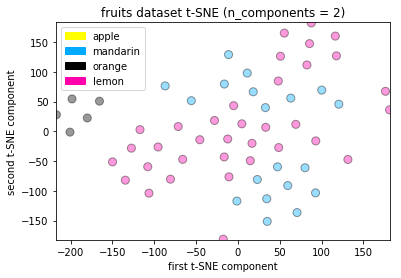

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0)

X_tsne = tsne.fit_transform(X_fruits_normalized)
plot_labelled_scatter(X_tsne,y_fruits,['apple','mandarin','orange','lemon'])

plt.xlabel('first t-SNE component')
plt.ylabel('second t-SNE component')
plt.title('fruits dataset t-SNE (n_components = 2)')